
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

CLASSIFICATION.
In this problem we only check the student is pass or fail.it has two possible output(yes/no)


### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [91]:
data=pd.read_csv(r"C:\Users\hp\Downloads\student-data.csv")

In [92]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [93]:
# Calculate number of student
total=data.shape[0]
total

395

In [94]:
# Calculate number of features
features=data.shape[1]
features

31

In [95]:
# Calculate passing students
passed=data["passed"].value_counts()["yes"]
passed

265

In [96]:
# Calculate failing students
failed=data["passed"].value_counts()["no"]
failed

130

In [97]:
# Calculate graduation rate
rate=passed/total*100
rate

67.08860759493672

In [98]:
# Print the results
print("Total number of student:",total)
print("Total number of features:",features)
print("Total number of student passed :",passed)
print("Total number of student failed :",failed)
print("Graduation rate:",rate)

Total number of student: 395
Total number of features: 31
Total number of student passed : 265
Total number of student failed : 130
Graduation rate: 67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [99]:
# Extract feature columns

In [100]:
data1=data.drop('passed',axis=1)
data1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [101]:
# Extract target column 'passed'

In [145]:
data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [146]:
# Separate the data into feature data and target data (X and y, respectively)

In [147]:
X = data.drop('passed',axis=1)
y = data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [148]:
X.select_dtypes(exclude=['int64','float64'])
for i in X.select_dtypes(exclude=['int64','float64']).columns:
    print(i,X[i].unique())
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
col_list=['school','sex','address','famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']
for a in np.arange(len(col_list)):
    X[col_list[a]] = label_en.fit_transform(X[col_list[a]])    

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [149]:
dummy_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
X = pd.get_dummies(X,drop_first=True)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [150]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [152]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print( "Testing set has {} samples.".format(X_test.shape[0]))


Training set has 316 samples.
Testing set has 79 samples.


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

Answer: The three models that are appropriate for this problem are : Logistic Regression, KNN, and SVM. These three models are chosen because our probelm is a classification problem and that too binary

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [153]:
#explaination
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [154]:
# Import the three supervised learning models from sklearn
from sklearn.metrics import accuracy_score,confusion_matrix


In [155]:
# fit model-1  on traning data 

# Logistic Regression


Logistic regression is a classification algorithm used to find the probability of event success and event failure.

Logistic regression is easier to implement, interpret, and very efficient to train. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

In [156]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [157]:
# predict on the test data 

In [158]:
y_pred_lr = model.predict(X_test)


In [159]:
# calculate the accuracy score

In [160]:
accuracy_score(y_test,y_pred_lr)

0.7341772151898734

In [161]:
confusion_matrix(y_test,y_pred_lr)

array([[12, 15],
       [ 6, 46]], dtype=int64)

# Logistic regression gives an accuracy of 70%.

In [162]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

# KNearestNeighbors


KNN is a very simple algorithm used to solve classification problems.There is no training period for KNN. It stores the training dataset and learns from it only at the time of making real time predictions.

Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

In [163]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [164]:
neighbors = np.arange(3,15)
acc_vals = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_vals.append(acc)
    

Text(0, 0.5, 'accuracy')

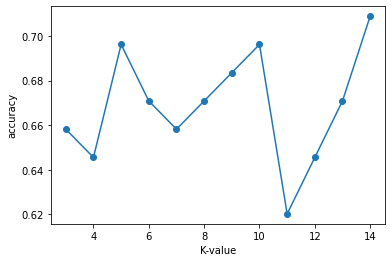

In [165]:
plt.plot(neighbors,acc_vals,'o-')
plt.xlabel('K-value')
plt.ylabel('accuracy')

In [166]:
#Use k=14
model = KNeighborsClassifier(n_neighbors=14,metric='euclidean')
model.fit(X_train,y_train)
y_pred_k = model.predict(X_test)
accuracy_score(y_test,y_pred_k)

0.7088607594936709

In [167]:
confusion_matrix(y_test,y_pred_k)

array([[ 7, 20],
       [ 3, 49]], dtype=int64)

# KNN gives an accuracy of 67%

# Support Vector Machine

SVM is effective in cases where the number of dimensions is greater than the number of samples
SVM algorithm is not suitable for large data sets.
SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.

In [168]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred_s = model.predict(X_test)
accuracy_score(y_test,y_pred_s)
confusion_matrix(y_test,y_pred_s)


array([[ 9, 18],
       [ 7, 45]], dtype=int64)